# B1. Autocorrelation

## B1.1. Notebook setup

In [2]:
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import emcee

plt.style.use('../thermal-gs.mplstyle')
warnings.filterwarnings('ignore')

## B1.2. <a href="google.com">Download data</a>

Unzip into a folder named <font color='green'>data</font> in the same level as the notebooks folder

## B1.3. Load

In [3]:
autocorr = np.loadtxt('../data/UXArietis_auto.txt')
sampler = emcee.backends.HDFBackend('../data/UXArietis_chain_burnin.h5')
samples = sampler.get_chain()

## B1.4. Plot

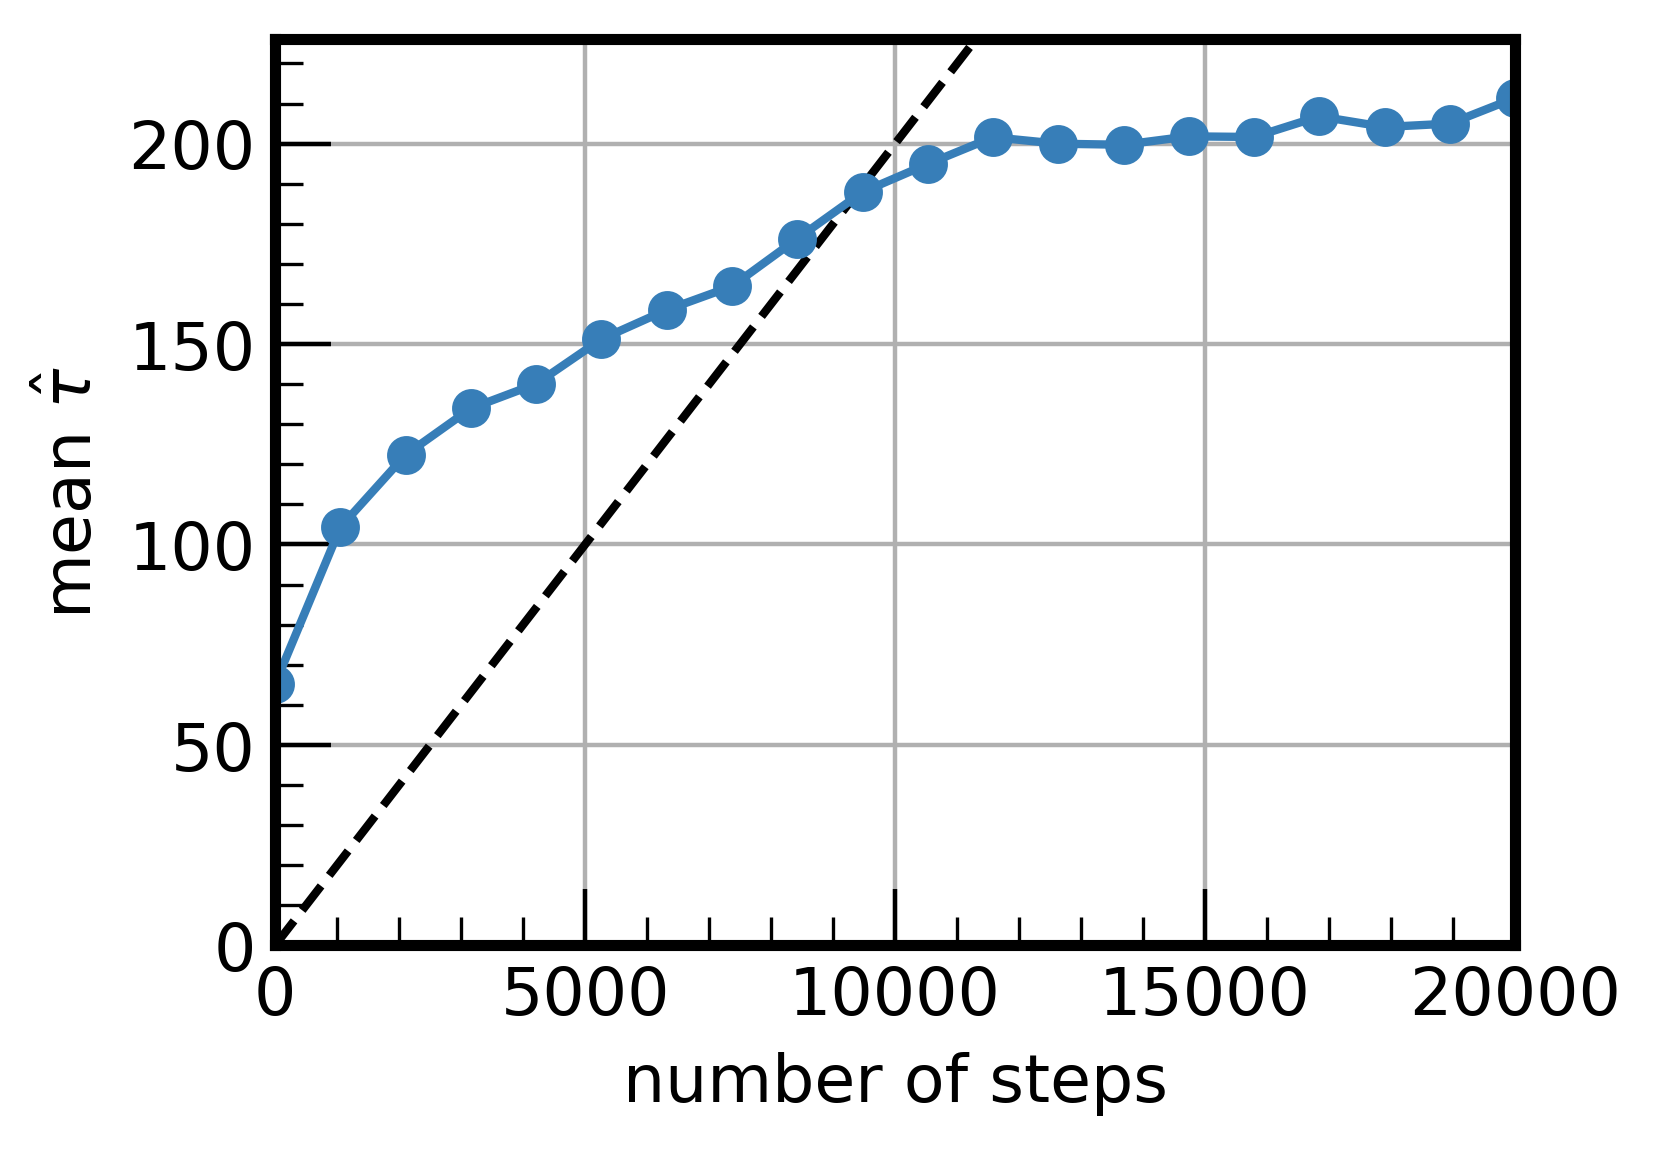

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.grid()

n = np.linspace(1, 20000, autocorr.shape[0])
ax.plot(n, n / 50, '--k', label='50x steps')
ax.plot(n, autocorr, 'o-', label='autocorrelation')
ax.set_xlim(0, n.max())
ax.set_ylim(0, autocorr.max() + 0.1 * (autocorr.max() - autocorr.min()))
ax.set_xlabel('number of steps')
ax.set_ylabel(r'mean $\hat{\tau}$')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(n[-1]/4))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(n[-1]/20))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

fig.set_facecolor('white')
plt.savefig('../figures/ux-arietis_auto.png', bbox_inches='tight')
plt.savefig('../figures/ux-arietis_auto.pdf', bbox_inches='tight')
plt.show()